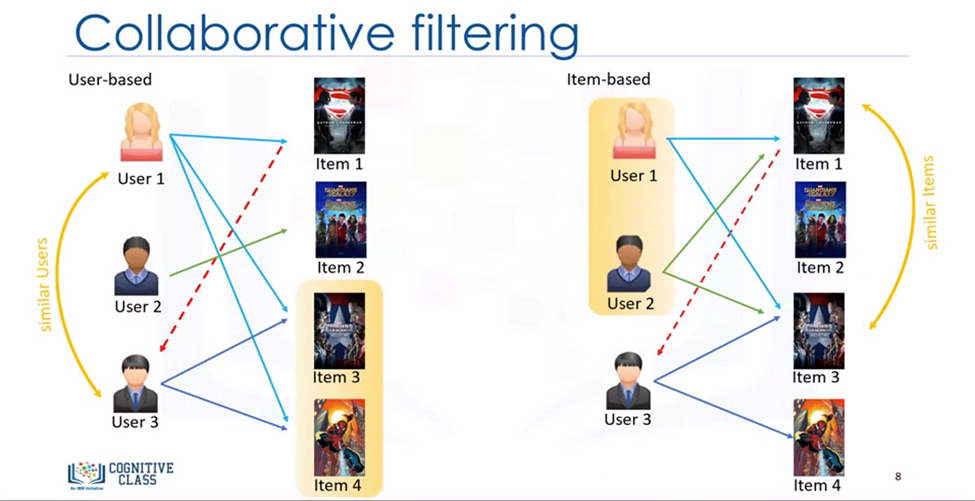

# `User-based collaborative filtering (UBCF)`

User-Based Collaborative Filtering (UBCF) is a technique used in recommendation systems to predict a user's preferences or interests by identifying patterns and similarities between users. The underlying idea is that users who have similar preferences in the past are likely to have similar preferences in the future. 

UBCF relies on the assumption that if a user A has similar tastes to user B and user A likes item X, then there's a good chance that user B will also like item X.

UBCF predicts a user's preferences by identifying and comparing similar users based on their past interactions or ratings. Similarity metrics like cosine similarity or Pearson correlation are often used.

Once similar users (neighborhood) are identified, predictions for a target user's preferences on unrated items are made by aggregating the preferences of the neighborhood. The system then recommends the top-rated items to the user based on these predictions.

**The steps involved in user-based collaborative filtering (CF) are as follows:**

**Step-1 :** Importing libraries which are required

**Step-2 :** Loading and reading the datasets i.e movies dataset and ratings dataset

**Step-3** : Merge the dataset

**Step-4** : Creating the User-Item Interaction matrix

**Step-5** : Calculate cosine similarity matrix for user-based collaborative filtering

**Step-6** : Recommendations

***
# Step-1: Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

# Step-2: Reading the dataset

In [4]:
movies=pd.read_csv("movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [7]:
movies.duplicated().sum()

0

In [8]:
movies.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

In [9]:
ratings=pd.read_csv('ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
ratings.duplicated().sum()

0

In [13]:
ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [14]:
#List of unique ratings
sorted(ratings['rating'].unique())

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Step-3: Merge the dataset

In [15]:
merge_df=pd.merge(movies,ratings,on='movieId')
merge_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [16]:
df=merge_df.groupby('title').agg(mean_rating = ('rating', 'mean'),number_of_ratings = ('rating', 'count')).reset_index()
df

,title,mean_rating,number_of_ratings
0,'71 (2014),4.000000,1
1,'Hellboy': The Seeds of Creation (2004),4.000000,1
2,'Round Midnight (1986),3.500000,2
3,'Salem's Lot (2004),5.000000,1
4,'Til There Was You (1997),4.000000,2
...,...,...,...
9714,eXistenZ (1999),3.863636,22
9715,xXx (2002),2.770833,24
9716,xXx: State of the Union (2005),2.000000,5
9717,¡Three Amigos! (1986),3.134615,26


In [17]:
# Top 10 Popular movies watched
df.sort_values(by='number_of_ratings',ascending=False).head(10)

,title,mean_rating,number_of_ratings
3158,Forrest Gump (1994),4.164134,329
7593,"Shawshank Redemption, The (1994)",4.429022,317
6865,Pulp Fiction (1994),4.197068,307
7680,"Silence of the Lambs, The (1991)",4.161290,279
5512,"Matrix, The (1999)",4.192446,278
8001,Star Wars: Episode IV - A New Hope (1977),4.231076,251
4662,Jurassic Park (1993),3.750000,238
1337,Braveheart (1995),4.031646,237
8363,Terminator 2: Judgment Day (1991),3.970982,224
7421,Schindler's List (1993),4.225000,220


In [18]:
df.describe()

,mean_rating,number_of_ratings
count,9719.000000,9719.000000
mean,3.262388,10.375141
std,0.870004,22.406220
min,0.500000,1.000000
25%,2.800000,1.000000
50%,3.416667,3.000000
75%,3.910357,9.000000
max,5.000000,329.000000


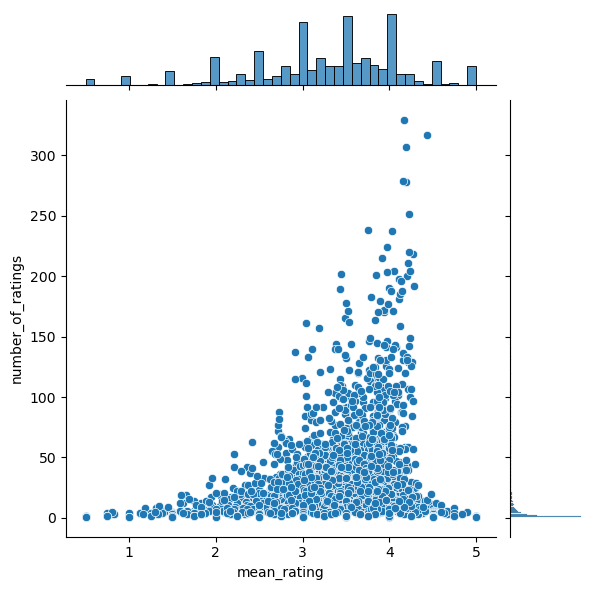

In [19]:
#Plotting the jointplot: to check the correlation between the average rating and the number of ratings.
sns.jointplot(x='mean_rating', y='number_of_ratings', data=df)

> _From the above plot, we observe an upward trend from the scatter plot, showing that popular movies get higher ratings. The average rating distribution shows that most movies in the dataset have an average rating of around 3. The number of rating distribution shows that most movies have less than 100 ratings._

# Step-4: Creating the User-Item Interaction matrix

In [20]:
user_movie_matrix=merge_df.pivot_table(index='userId', columns='title', values='rating').fillna(0)
user_movie_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


# Step-5: cosine similarity matrix for user-based collaborative filtering

In [21]:
# User similarity matrix using cosine similarity
cosine_sim = pd.DataFrame(cosine_similarity(user_movie_matrix), index=user_movie_matrix.index, columns=user_movie_matrix.index)
cosine_sim

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.164191,0.028429,0.012993,0.200395,0.106435,0.102123,0.200035,0.099388,0.075898,0.088963,...,0.178084,0.116534,0.300669,0.066032,0.148141,1.000000,0.153063,0.262558,0.069622,0.201104
607,0.269389,0.012948,0.019247,0.131746,0.152866,0.162182,0.186114,0.185142,0.011844,0.010451,...,0.092525,0.199910,0.203540,0.137834,0.118780,0.153063,1.000000,0.283081,0.149190,0.139114
608,0.291097,0.046211,0.021128,0.149858,0.135535,0.178809,0.323541,0.187233,0.100435,0.077424,...,0.158355,0.197514,0.232771,0.155306,0.178142,0.262558,0.283081,1.000000,0.121993,0.322055


# Step - 6 : Recommendations

In [22]:
# 1. Choose a user for whom you want to make movie recommendations
user_id = 8

In [23]:
# 2. Compute the similarity between the chosen user and all other users
user_similarity = cosine_sim[user_id]
user_similarity

userId
1      0.136968
2      0.027257
3      0.004941
4      0.062969
5      0.429075
         ...   
606    0.099388
607    0.185142
608    0.187233
609    0.423993
610    0.078153
Name: 8, Length: 610, dtype: float64

In [24]:
# 3. Create a DataFrame to store user similarity
user_similarity_df = pd.DataFrame({'userId': user_movie_matrix.index, 'similarity': user_similarity.values})
user_similarity_df

,userId,similarity
0,1,0.136968
1,2,0.027257
2,3,0.004941
3,4,0.062969
4,5,0.429075
...,...,...
605,606,0.099388
606,607,0.185142
607,608,0.187233
608,609,0.423993


In [25]:
# 4. Filter out the chosen user and sort the DataFrame by similarity in descending order
user_similarity_df = user_similarity_df[user_similarity_df['userId'] != user_id]
user_similarity_df = user_similarity_df.sort_values(by='similarity', ascending=False)
user_similarity_df 

,userId,similarity
378,379,0.688842
93,94,0.662346
511,512,0.655390
346,347,0.647353
445,446,0.636885
...,...,...
252,253,0.000000
244,245,0.000000
546,547,0.000000
544,545,0.000000


In [26]:
# 5. Merge the user similarity DataFrame with the user-movie matrix to get the movie ratings of similar users
similar_user_ratings = pd.merge(user_similarity_df, user_movie_matrix, left_on='userId', right_index=True)
similar_user_ratings

,userId,similarity,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
378,379,0.688842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,94,0.662346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511,512,0.655390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
346,347,0.647353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
445,446,0.636885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,253,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,245,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546,547,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544,545,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# 6. Calculate the weighted average of movie ratings based on user similarity
similar_user_ratings.set_index('userId', inplace=True)
similar_user_ratings

,similarity,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
379,0.688842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.662346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,0.655390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0.647353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,0.636885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
weighted_ratings = similar_user_ratings.mul(similar_user_ratings['similarity'], axis=0)
sum_of_similarity = similar_user_ratings['similarity'].sum()
recommended_movies = weighted_ratings.sum() / sum_of_similarity

In [29]:
recommended_movies

similarity                                   0.302785
'71 (2014)                                   0.003352
'Hellboy': The Seeds of Creation (2004)      0.006386
'Round Midnight (1986)                       0.007308
'Salem's Lot (2004)                          0.001388
                                               ...   
eXistenZ (1999)                              0.104521
xXx (2002)                                   0.088254
xXx: State of the Union (2005)               0.013768
¡Three Amigos! (1986)                        0.125305
À nous la liberté (Freedom for Us) (1931)    0.001169
Length: 9720, dtype: float64

In [30]:
# 7. Sort the recommended movies by their weighted average rating
recommended_movies = recommended_movies.sort_values(ascending=False)
recommended_movies

Forrest Gump (1994)                 3.143043
Shawshank Redemption, The (1994)    3.069417
Pulp Fiction (1994)                 2.977126
Silence of the Lambs, The (1991)    2.641108
Braveheart (1995)                   2.578554
                                      ...   
Annabelle: Creation (2017)          0.000000
Come See the Paradise (1990)        0.000000
Blind Date (1984)                   0.000000
Emerald Forest, The (1985)          0.000000
Bossa Nova (2000)                   0.000000
Length: 9720, dtype: float64

In [31]:
# 8. Filter out movies that the user has already rated
user_rated_movies = merge_df[merge_df['userId'] == user_id]['title']
recommended_movies = recommended_movies[~recommended_movies.index.isin(user_rated_movies)]
recommended_movies

Terminator 2: Judgment Day (1991)    2.136569
Aladdin (1992)                       1.881539
Die Hard: With a Vengeance (1995)    1.637264
Toy Story (1995)                     1.619714
Matrix, The (1999)                   1.559587
                                       ...   
Annabelle: Creation (2017)           0.000000
Come See the Paradise (1990)         0.000000
Blind Date (1984)                    0.000000
Emerald Forest, The (1985)           0.000000
Bossa Nova (2000)                    0.000000
Length: 9673, dtype: float64

In [32]:
# 9. Display the top  recommended movies
print("Top 10 recommended movies for user {}:".format(user_id))
print(recommended_movies.head(10))


Top 10 recommended movies for user 8:
Terminator 2: Judgment Day (1991)            2.136569
Aladdin (1992)                               1.881539
Die Hard: With a Vengeance (1995)            1.637264
Toy Story (1995)                             1.619714
Matrix, The (1999)                           1.559587
Beauty and the Beast (1991)                  1.551103
Clear and Present Danger (1994)              1.519118
Star Wars: Episode IV - A New Hope (1977)    1.495909
Crimson Tide (1995)                          1.475648
Ace Ventura: Pet Detective (1994)            1.462336
dtype: float64


In [33]:
def get_top_recommended_movies(user_id, cosine_sim=cosine_sim, user_movie_matrix=user_movie_matrix, merge_df=merge_df, top_N=10):
    user_similarity = cosine_sim[user_id]
    user_similarity_df = pd.DataFrame({'userId': user_movie_matrix.index, 'similarity': user_similarity.values})
    user_similarity_df = user_similarity_df[user_similarity_df['userId'] != user_id]
    user_similarity_df = user_similarity_df.sort_values(by='similarity', ascending=False)
    similar_user_ratings = pd.merge(user_similarity_df, user_movie_matrix, left_on='userId', right_index=True)
    similar_user_ratings.set_index('userId', inplace=True)
    weighted_ratings = similar_user_ratings.mul(similar_user_ratings['similarity'], axis=0)
    sum_of_similarity = similar_user_ratings['similarity'].sum()
    recommended_movies = weighted_ratings.sum() / sum_of_similarity
    recommended_movies = recommended_movies.sort_values(ascending=False)
    user_rated_movies = merge_df[merge_df['userId'] == user_id]['title']
    recommended_movies = recommended_movies[~recommended_movies.index.isin(user_rated_movies)]
    print(f"Top {top_N} recommended movies for user {user_id}:")
    print(recommended_movies.head(top_N))
    
    return recommended_movies.head(top_N)


In [34]:
# Example:
user_id = 8
recommended_movies = get_top_recommended_movies(user_id)

Top 10 recommended movies for user 8:
Terminator 2: Judgment Day (1991)            2.136569
Aladdin (1992)                               1.881539
Die Hard: With a Vengeance (1995)            1.637264
Toy Story (1995)                             1.619714
Matrix, The (1999)                           1.559587
Beauty and the Beast (1991)                  1.551103
Clear and Present Danger (1994)              1.519118
Star Wars: Episode IV - A New Hope (1977)    1.495909
Crimson Tide (1995)                          1.475648
Ace Ventura: Pet Detective (1994)            1.462336
dtype: float64


# Saving the Model

In [35]:
import pickle

In [36]:
pickle.dump(cosine_sim,open('cosine_sim.pkl','wb'))
pickle.dump(user_movie_matrix,open('user_movie_matrix.pkl','wb'))
pickle.dump(merge_df,open('merge_df.pkl','wb'))